# Imports

## Packages

In [1]:
import torch.optim
from torch.utils import data
import argparse
import json
from tqdm import tqdm
import sys
import clip
sys.path.append('/home/guest/Documents/Siraj TM/RSCaMa')
from model.model_encoder_attMamba import Encoder, AttentiveEncoder
from model.model_decoder import DecoderTransformer
from utils_tool.utils import *
from data.LEVIR_CC.LEVIRCC import LEVIRCCDataset
from torch import nn, einsum

from PIL import Image
from imageio import imread
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt

/home/guest/anaconda3/envs/RSCaMa_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Functions

In [4]:
def load_json(path):
    with open(path) as f:
        file = json.load(f)
    f.close()
    return file
def save_json(file,path):
    with open(path,'w') as f:
        json.dump(file,f)
    f.close()
    print("Saved Successfully")
def rem_print(word):
    t_word = word
    for _ in range(100 - len(t_word)):
        word = word + ' '
    print(word,end='\r')

## Data

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [5]:
word_vocab = load_json('assets/vocab.json')

parser.add_argument('--decoder_type', default='transformer_decoder', help='mamba or gpt or transformer_decoder')
parser.add_argument('--network', default='CLIP-ViT-B/32',help='define the backbone encoder to extract features')
parser.add_argument('--encoder_dim', type=int, default=768, help='the dim of extracted features of backbone ')
parser.add_argument('--feat_size', type=int, default=16, help='size of extracted features of backbone')
# Model parameters
parser.add_argument('--n_heads', type=int, default=8, help='Multi-head attention in Transformer.')
parser.add_argument('--n_layers', type=int, default=3, help='Number of layers in AttentionEncoder.')
parser.add_argument('--decoder_n_layers', type=int, default=1)
parser.add_argument('--embed_dim', type=int, default=768, help='embedding dimension')
args = parser.parse_args()

In [44]:
test_loader = data.DataLoader(
                LEVIRCCDataset('CLIP-ViT-B/32', 'DATA/LEVIRCC/Images', "DATA/LEVIRCC/", 'test', 'DATA/LEVIRCC/Tokens', Vocab, 42, 1),
                batch_size=1, shuffle=False, num_workers=10, pin_memory=True)

FileNotFoundError: [Errno 2] No such file or directory: 'DATA/LEVIRCC/test.txt'

# Analysis

In [6]:

Vocab = {key:word_vocab[key] for key in list(word_vocab.keys())[:468]}


In [7]:
model, preprocess = clip.load("ViT-B/32", device=device)

In [8]:
encoder = Encoder('CLIP-ViT-B/32')
encoder_trans = AttentiveEncoder(n_layers=3,
                                        feature_size=[7, 7, 768],
                                        heads=8, dropout=0.1)
decoder = DecoderTransformer(decoder_type='transformer_decoder',embed_dim=768,
                                    vocab_size=len(Vocab), max_lengths=42,
                                    word_vocab=Vocab, n_head=8,
                                    n_layers=1, dropout=0.1)

decoder_n_layers= 1
decoder_type= transformer_decoder


In [ ]:
checkpoint = torch.load('DATA/Pre-Trained Models/RSCaMa.pth',map_location=device)

In [10]:
encoder.load_state_dict(checkpoint['encoder_dict'])
encoder_trans.load_state_dict(checkpoint['encoder_trans_dict'])
decoder.load_state_dict(checkpoint['decoder_dict'])

<All keys matched successfully>

In [11]:
encoder.eval()
encoder = encoder.cuda()
encoder_trans.eval()
encoder_trans = encoder_trans.cuda()
decoder.eval()
decoder = decoder.cuda()
print('load model success!')

load model success!


In [12]:
ImA = io.imread('/home/guest/Documents/Siraj TM/DATA/Train/train/A/train_177.png')
ImB =  io.imread('/home/guest/Documents/Siraj TM/DATA/Train/train/B/train_177.png')

In [13]:
ImA = preprocess(Image.fromarray(ImA)).unsqueeze(0).to(device)
ImB = preprocess(Image.fromarray(ImB)).unsqueeze(0).to(device)

In [14]:
with torch.no_grad():
    feat1,feat2 = encoder(ImA,ImB)
    feat = encoder_trans(feat1,feat2)
    seq = decoder.sample(feat,k=1)

/home/guest/anaconda3/envs/RSCaMa_env/lib/python3.9/site-packages/torch/nn/functional.py:4999: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(


In [15]:
seq

[2, 399, 346, 206, 399, 344, 28, 40, 3]

In [17]:
except_tokens = {Vocab['<START>'], Vocab['<END>'], Vocab['<NULL>']}
except_tokens

{0, 2, 3}

In [18]:
pred_seq = [w for w in seq if w not in except_tokens]
pred_seq

[399, 346, 206, 399, 344, 28, 40]

In [23]:
invert = {val:key for key,val in word_vocab.items()}

In [21]:
word_vocab

{'<NULL>': 0,
 '<UNK>': 1,
 '<START>': 2,
 '<END>': 3,
 'a': 4,
 'abandoned': 5,
 'above': 6,
 'across': 7,
 'added': 8,
 'additional': 9,
 'all': 10,
 'almost': 11,
 'along': 12,
 'alongside': 13,
 'among': 14,
 'an': 15,
 'and': 16,
 'angle': 17,
 'another': 18,
 'appear': 19,
 'appeared': 20,
 'appears': 21,
 'arc': 22,
 'are': 23,
 'area': 24,
 'areas': 25,
 'around': 26,
 'arranged': 27,
 'as': 28,
 'asphalt': 29,
 'at': 30,
 'attached': 31,
 'bank': 32,
 'bare': 33,
 'bareland': 34,
 'barelands': 35,
 'basketball': 36,
 'become': 37,
 'becomes': 38,
 'been': 39,
 'before': 40,
 'behind': 41,
 'below': 42,
 'beside': 43,
 'besides': 44,
 'between': 45,
 'big': 46,
 'bigger': 47,
 'black': 48,
 'block': 49,
 'blocks': 50,
 'blue': 51,
 'both': 52,
 'bottom': 53,
 'boxes': 54,
 'branch': 55,
 'branches': 56,
 'brand': 57,
 'bridge': 58,
 'bridges': 59,
 'broadened': 60,
 'brushwoods': 61,
 'build': 62,
 'building': 63,
 'buildings': 64,
 'built': 65,
 'bungalow': 66,
 'bungalows': 6

In [24]:
caption = [invert[token] for token in pred_seq]
caption

['squares', 'replacing', 'have', 'squares', 'replaced', 'as', 'before']

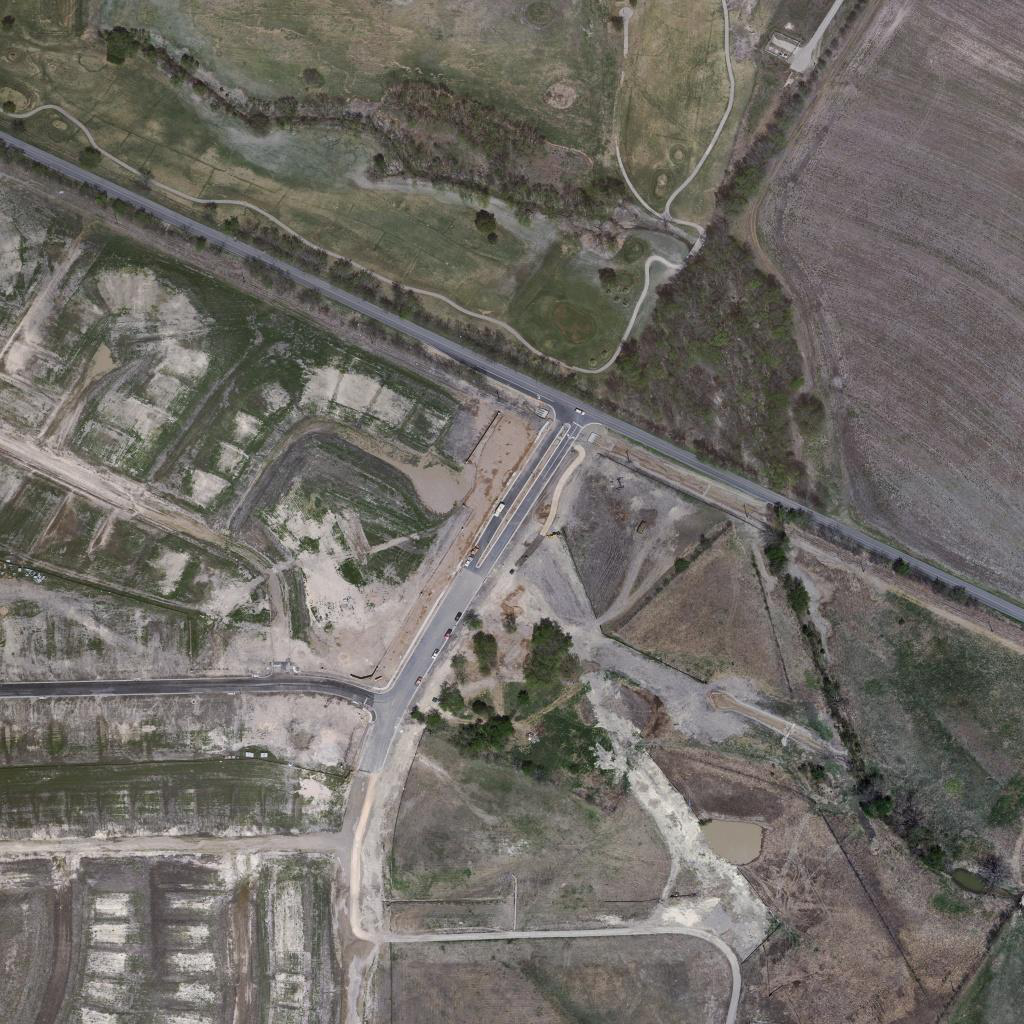

In [26]:
Image.open('/home/guest/Documents/Siraj TM/DATA/Train/train/A/train_177.png')

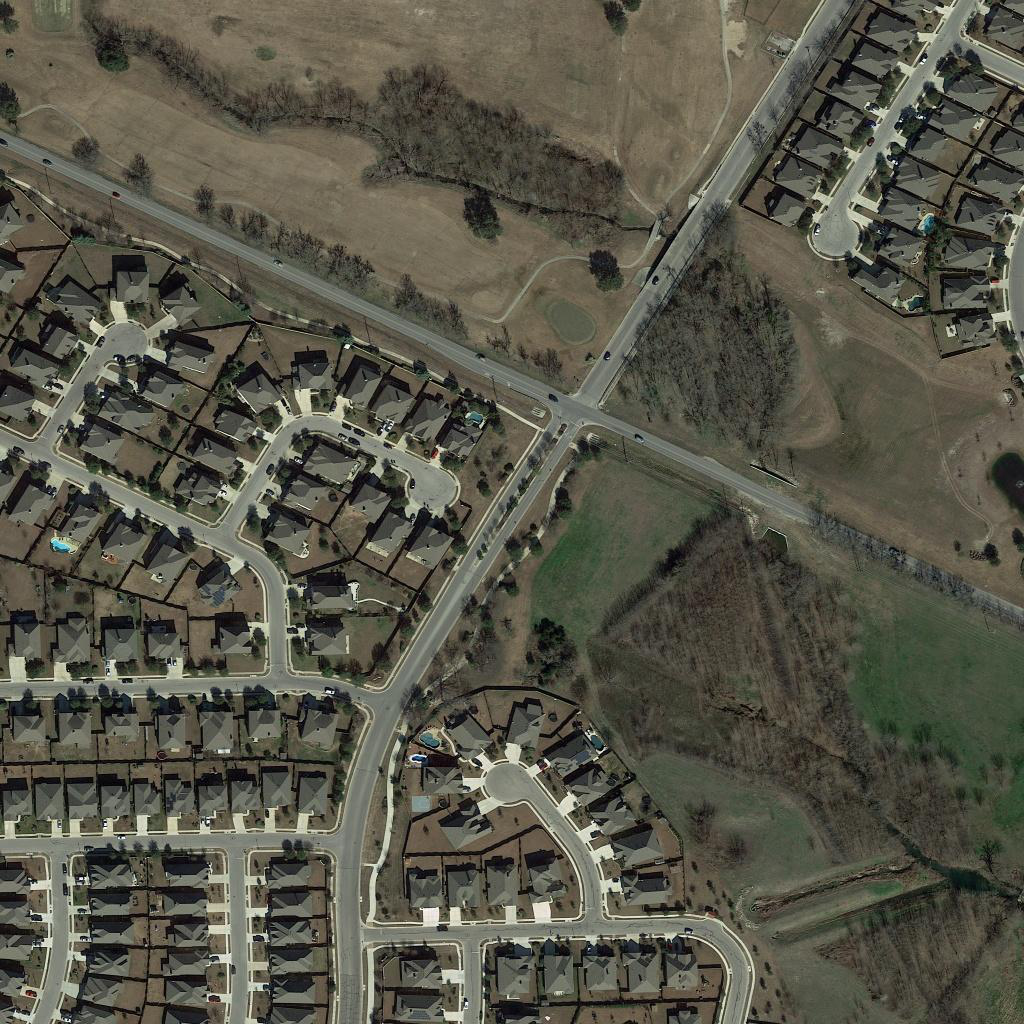

In [27]:
Image.open('/home/guest/Documents/Siraj TM/DATA/Train/train/B/train_177.png')

In [28]:
os.listdir('/home/guest/Documents/Siraj TM/Text Captioning/DATA/LEVIRCC/Images')

[]

# Data

In [ ]:
'''from zipfile import ZipFile 
with ZipFile("DATA/Levir-CC-dataset.zip", 'r') as zObject: 
  
    # Extracting all the members of the zip  
    # into a specific location. 
    zObject.extractall( 
        path="DATA/Levir-CC-dataset")'''

In [ ]:
Captions = load_json("DATA/Levir-CC-dataset/LevirCCcaptions.json")
test_path = 'DATA/Levir-CC-dataset/images/test'

In [54]:
Captions['images'][696]['sentences'][0]

{'tokens': ['a',
  'road',
  'comes',
  'across',
  'the',
  'vegetation',
  'in',
  'the',
  'center'],
 'raw': ' a road comes across the vegetation in the center .',
 'imgid': 696,
 'sentid': 3480}

In [44]:
files = [Captions['images'][i]['filename'] for i in [1,2,873,696,500]]
files

['train_000002.png',
 'train_000003.png',
 'train_000927.png',
 'train_000735.png',
 'train_000529.png']

In [86]:
def get_tokens(index):
    
    Path = 'DATA/Levir-CC-dataset/images/'
    Image_name = Captions['images'][index]['filename']
    dir_path = Path + '/' +  Captions['images'][index]['filepath']
    
    ImA =  f"{dir_path}/A/{Image_name}"
    ImB =  f"{dir_path}/B/{Image_name}"
       
    Ground_truth = Captions['images'][index]['sentences'][0]['raw']
    
    IMA = preprocess(Image.fromarray(
        io.imread(ImA)
        )).unsqueeze(0).to(device)
    
    IMB = preprocess(Image.fromarray(
        io.imread(ImB)
        )).unsqueeze(0).to(device)
    
    
    with torch.no_grad():
        feat1,feat2 = encoder(IMA,IMB)
        feat = encoder_trans(feat1,feat2)
        seq = decoder.sample(feat,k=1)
        
    pred_seq = [w for w in seq if w not in except_tokens]
    caption = [invert[token] for token in pred_seq]
    
    output = ''
    for word in caption:
        output += word + ' '
        
    print(f"Predicted_Caption : {output}\tGround Truth : {Ground_truth} ")

    fig,axes = plt.subplots(1,2)
    axes[0].set_title(f"Before - Index:{index}")
    axes[0].imshow(np.asarray(Image.open(ImA)))
    axes[0].axis('off')
    
    axes[1].set_title(f"After - Index:{index}")
    axes[1].imshow(np.asarray(Image.open(ImB)))
    axes[1].axis('off')
    plt.show()

In [89]:
import random

In [ ]:
!nvidia-smi

Tue Mar 18 08:07:29 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.28.03              Driver Version: 560.28.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA RTX A5000               Off |   00000000:65:00.0 Off |                  Off |
| 30%   39C    P8              9W /  230W |    8281MiB /  24564MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

: 

Predicted_Caption : line green are build along squares pulled 	Ground Truth :  many neatly arranged buildings appear alongside the road . 


/home/guest/anaconda3/envs/RSCaMa_env/lib/python3.9/site-packages/torch/nn/functional.py:4999: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(


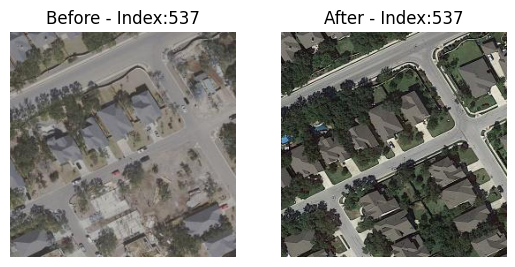

Predicted_Caption : squares replacing have squares replaced as before 	Ground Truth :  there is no difference . 


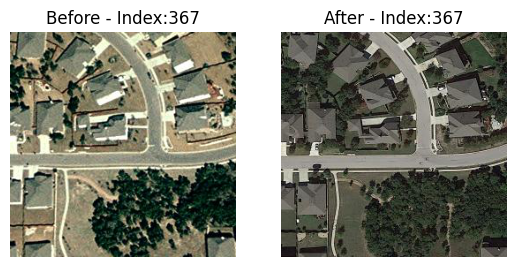

Predicted_Caption : a roundabout greatly appears groups squares factory 	Ground Truth :  a small house appear at the bottom of the scene . 


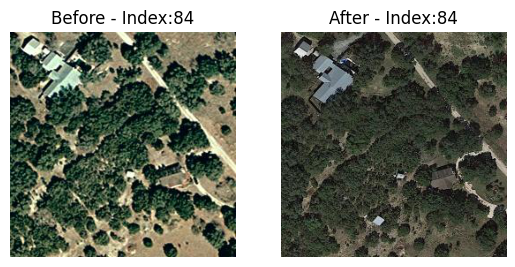

Predicted_Caption : rows green are build along squares pulled 	Ground Truth :  several houses are built alongside the road . 


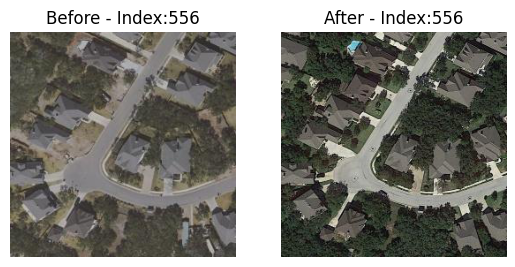

Predicted_Caption : t-shaped green are build along squares pulled 	Ground Truth :  several completed villas with a path connected to the road appear . 


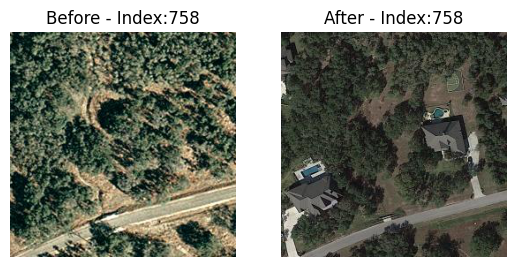

Predicted_Caption : rows green are build among squares surrounded 	Ground Truth :  some houses are scattered in the forest . 


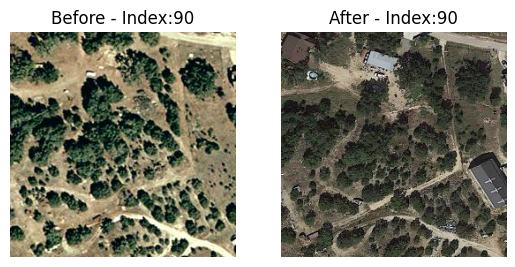

Predicted_Caption : line green are build along squares pulled 	Ground Truth :  some houses line up neatly by the road . 


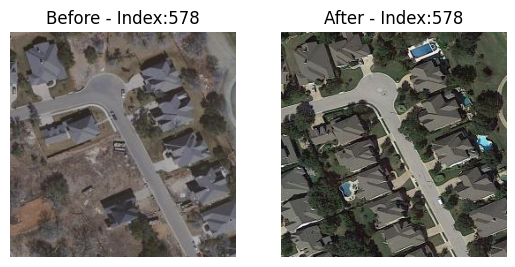

Predicted_Caption : rows surrounded are place and rows green are build 	Ground Truth :  some trees in the woods are removed and some villas are built there . 


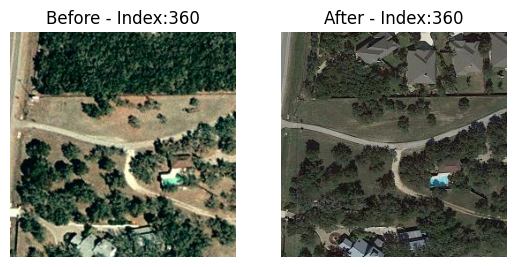

Predicted_Caption : squares replacing have squares replaced as before 	Ground Truth :  there is no difference . 


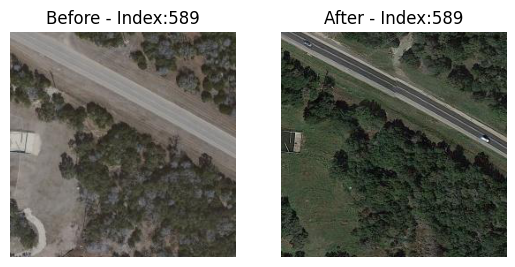

Predicted_Caption : a greatly appears groups squares vehicles groups squares ponds construction medium squares replacing 	Ground Truth :  a completed house appears in the woods . 


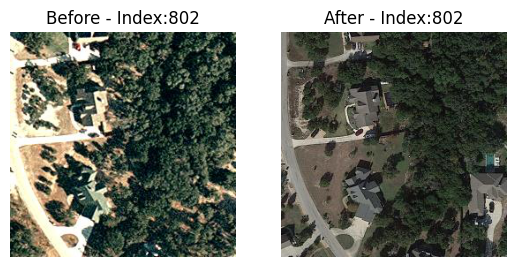

In [90]:
for index in [random.randint(0,1000) for _ in range(10)]:
    get_tokens(index)